In [43]:
import os
import cv2

def list_files_in_folder(folder_path):
    file_list = []
    # Iterate through all files in the folder
    for file_name in os.listdir(folder_path):
        # Check if the path is a file (not a directory)
        if os.path.isfile(os.path.join(folder_path, file_name)):
            file_list.append(file_name)
    return file_list

pseudo_folder =  r"D:\Project\DPL302m\Data\crawledData2\generatorOutput\img\non_makeup"
folder_path = r"D:\Project\DPL302m\Data\crawledData2\original\non_makeup"
file_list = list_files_in_folder(pseudo_folder)
size_count = {}  # Dictionary to store count of each image size
threshold = 361*361
# Loop through each file in the folder
for filename in file_list:
    img = cv2.imread(os.path.join(folder_path, filename))  # Load the image
    if img is not None:
        dimens = img.shape[0]*img.shape[1]
        if dimens > threshold:
            if "larger" in size_count:
                size_count['larger'] += 1
            else:
                size_count['larger'] = 1
        else:
            if "smaller" in size_count:
                size_count['smaller'] += 1
            else:
                size_count['smaller'] = 1
# print(size_count)

size_count = dict(sorted(size_count.items(), key=lambda item: item[1], reverse=True))
print(size_count)
with open('rawDataNonMakeup.txt', 'w') as file:
    for key, value in size_count.items():
        file.write(f'{key}: {value}\n')

{'larger': 108, 'smaller': 55}


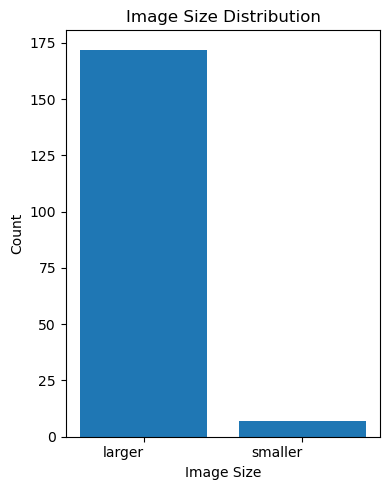

In [40]:
import matplotlib.pyplot as plt
sizes = list(size_count.keys())
counts = list(size_count.values())

# Plotting
plt.figure(figsize=(4,5))  # Set the size of the plot
plt.bar(range(len(sizes)), counts, tick_label=[str(size) for size in sizes])
plt.xlabel('Image Size')  # Label for x-axis
plt.ylabel('Count')  # Label for y-axis
plt.title('Image Size Distribution')  # Title of the plot
plt.xticks(rotation=0, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

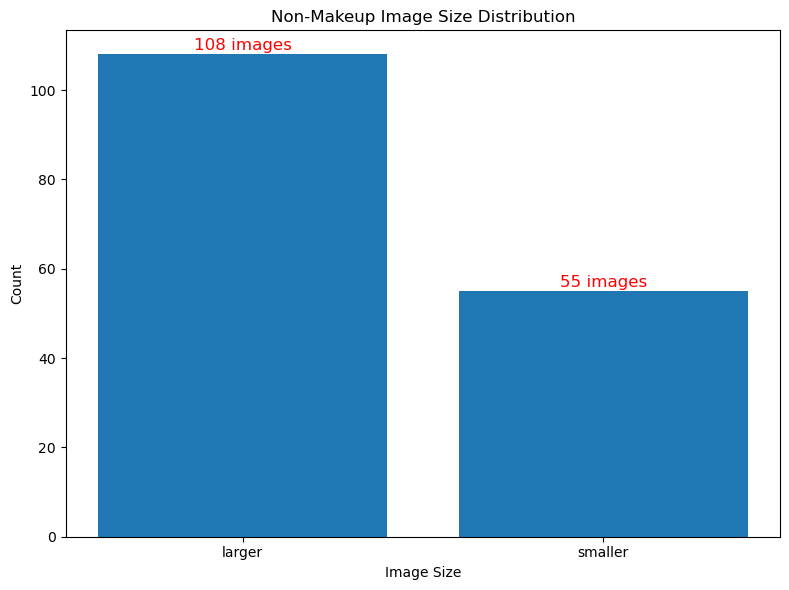

In [47]:
import matplotlib.pyplot as plt

# Assuming you have already defined 'sizes' and 'counts'
sizes = list(size_count.keys())
counts = list(size_count.values())
# Plotting
plt.figure(figsize=(8, 6))  # Set the size of the plot
plt.bar(range(len(sizes)), counts, tick_label=[str(size) for size in sizes])
plt.xlabel('Image Size')  # Label for x-axis
plt.ylabel('Count')  # Label for y-axis
plt.title('Non-Makeup Image Size Distribution')  # Title of the plot
plt.xticks(rotation=0, ha='center')  # Rotate x-axis labels for better readability

# Add text at a certain coordinate
plt.text(1, 56, f'{counts[1]} images', fontsize=12, color='red',ha='center',)  # Adjust the coordinates and other parameters as needed
plt.text(0, 109,f'{counts[0]} images', fontsize=12, color='red',ha='center')  # Adjust the coordinates and other parameters as needed

# plt.text(i, percentage, f'{percentage:.2f}%', ha='center', va='bottom')

plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()
